In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from io import IncrementalNewlineDecoder

**Loading** **the** **Dataset**

In [ ]:
#import dataset
ds= pd.read_csv("phishing_website dataset.csv")
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
ds.tail(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [ ]:
ds.shape

(11055, 32)

In [ ]:
ds.loc[0]

,0
index,1
having_IPhaving_IP_Address,-1
URLURL_Length,1
Shortining_Service,1
having_At_Symbol,1
double_slash_redirecting,-1
Prefix_Suffix,-1
having_Sub_Domain,-1
SSLfinal_State,-1
Domain_registeration_length,-1


In [ ]:
#Checking null values
ds.info()
ds.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

,0
index,False
having_IPhaving_IP_Address,False
URLURL_Length,False
Shortining_Service,False
having_At_Symbol,False
double_slash_redirecting,False
Prefix_Suffix,False
having_Sub_Domain,False
SSLfinal_State,False
Domain_registeration_length,False


Univariate Analysis

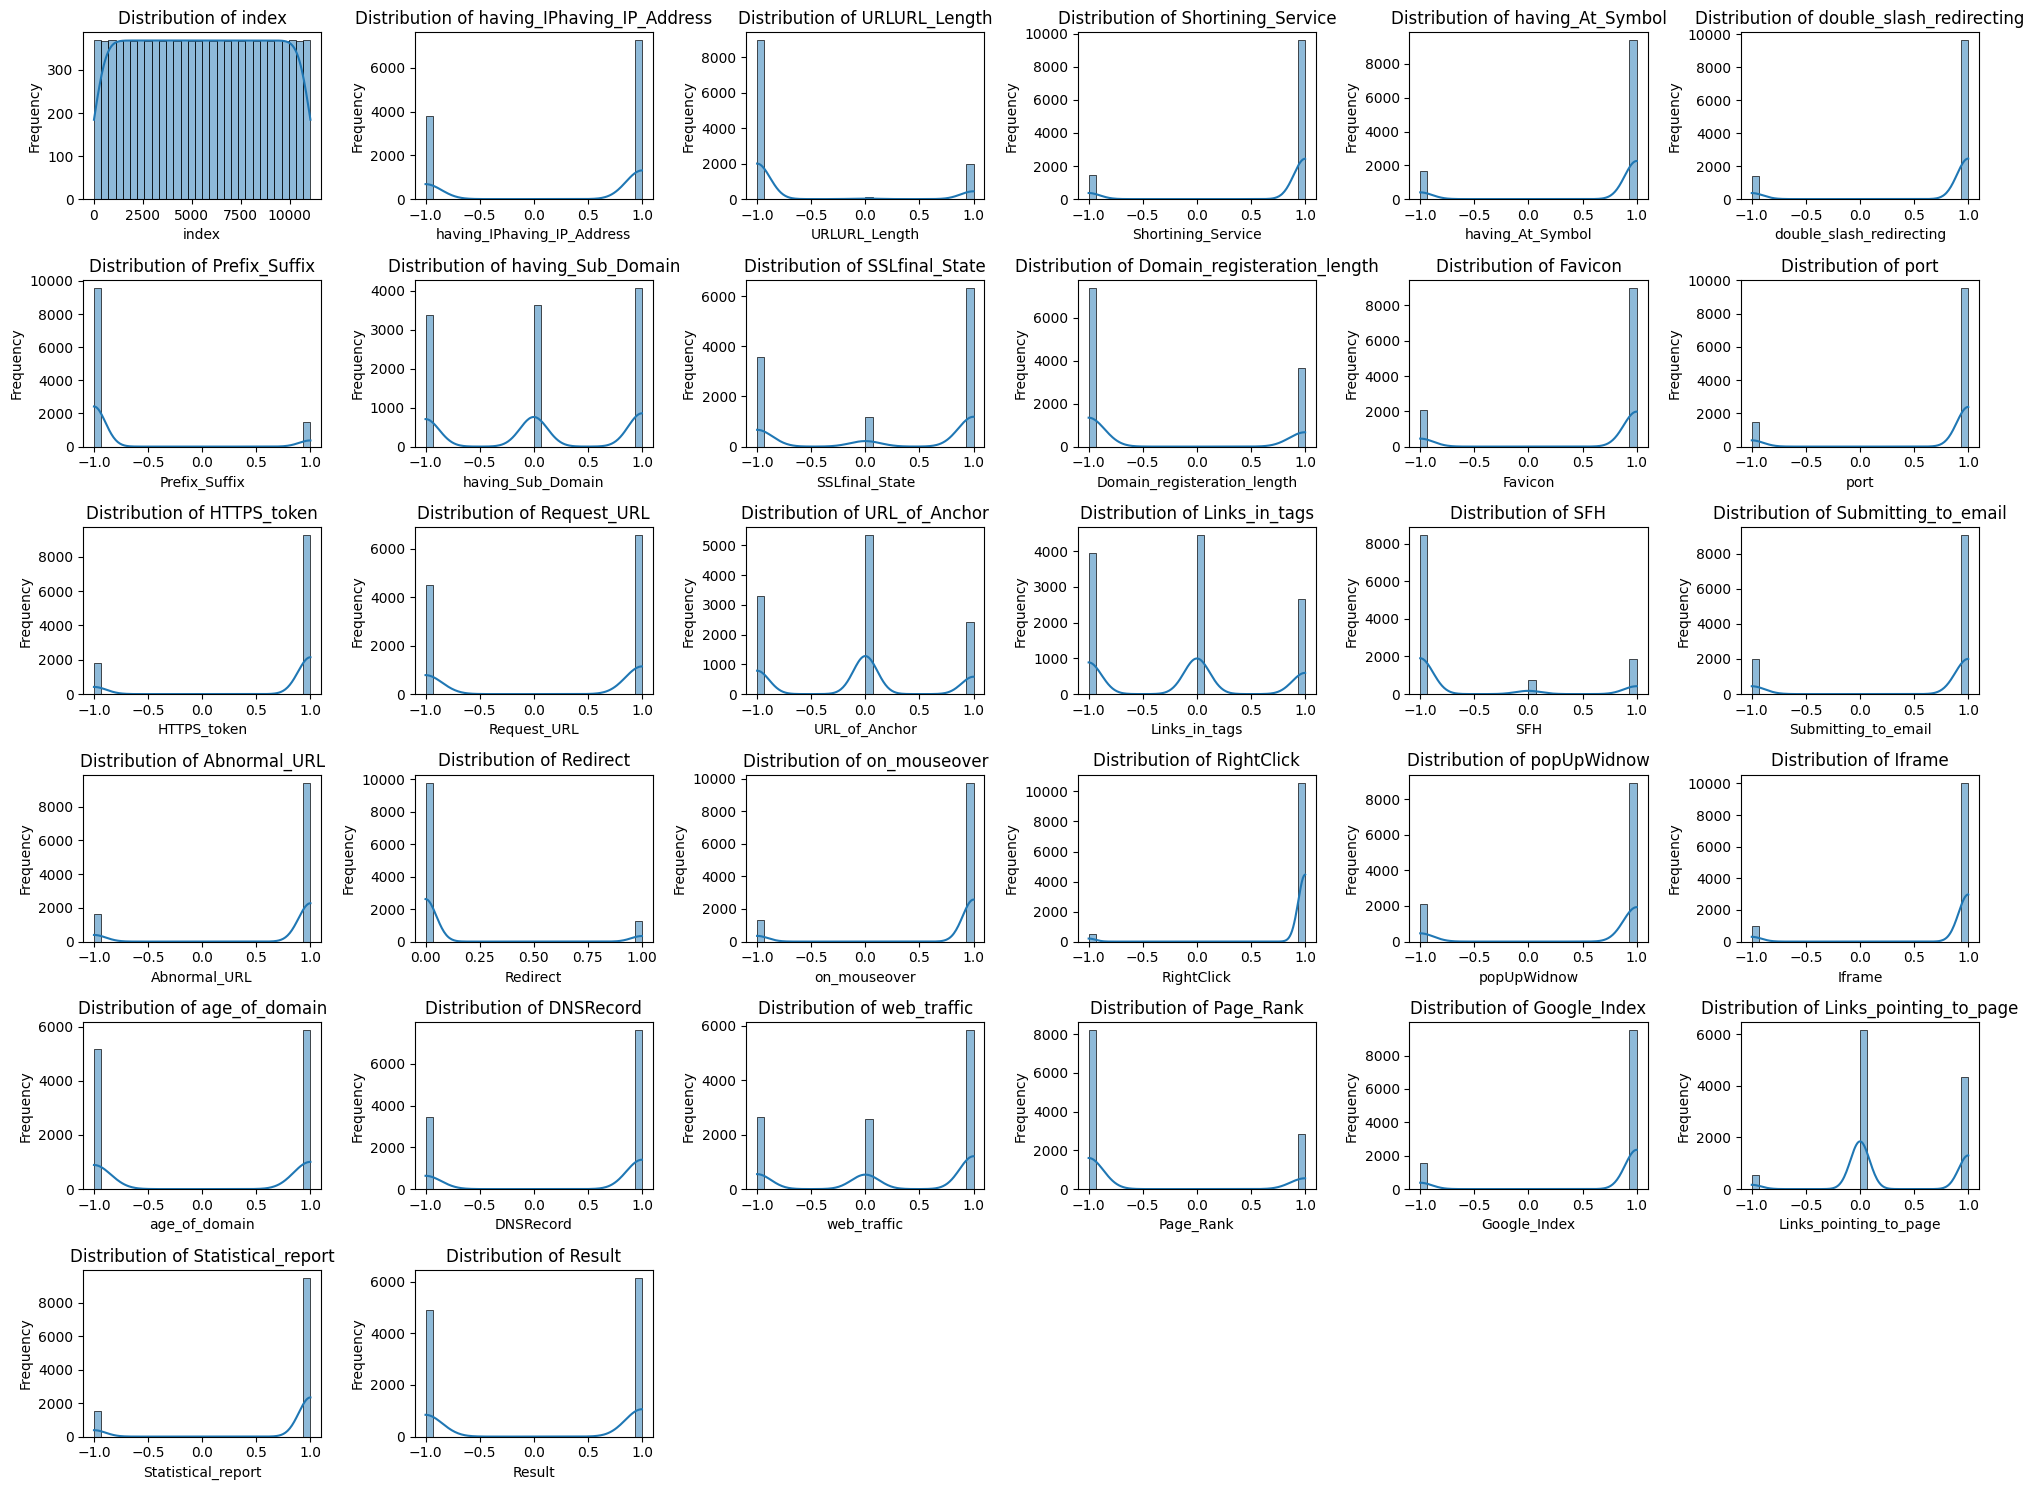

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ds.select_dtypes(include=['float64', 'int64']).columns
# Calculate the number of rows and columns for the subplot grid
num_rows = (len(num_cols) + 5) // 6  # Calculate rows, ensuring enough space
# +5 to round up for the leftover plots, if any

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 6, i)  # Dynamically adjust grid size
    sns.histplot(ds[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Bivariate Analysis

<Axes: xlabel='web_traffic', ylabel='port'>

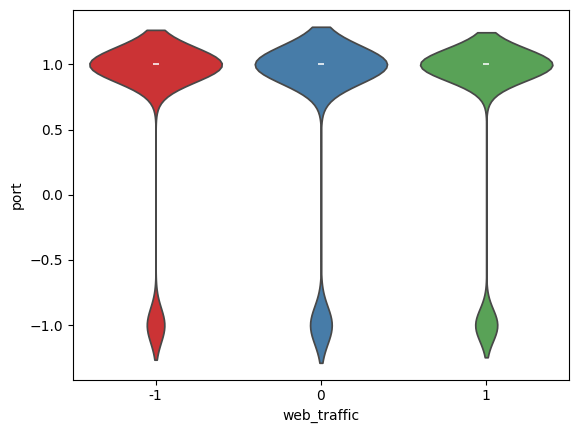

In [ ]:
sns.violinplot(x = ds['web_traffic'],y = ds['port'], palette = 'Set1', data =ds)

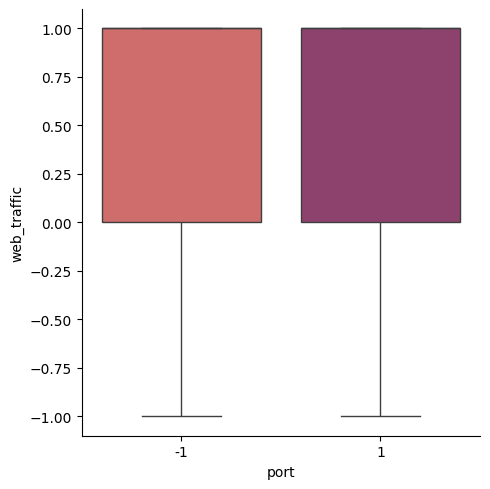

In [ ]:
sns.catplot(x='port', y = 'web_traffic',kind = 'box', data=ds, palette='flare')

Multi Variate Analysis

In [ ]:
sns.pairplot(ds)

**Feature** **Extration**

In [ ]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

**Visualizing the data**

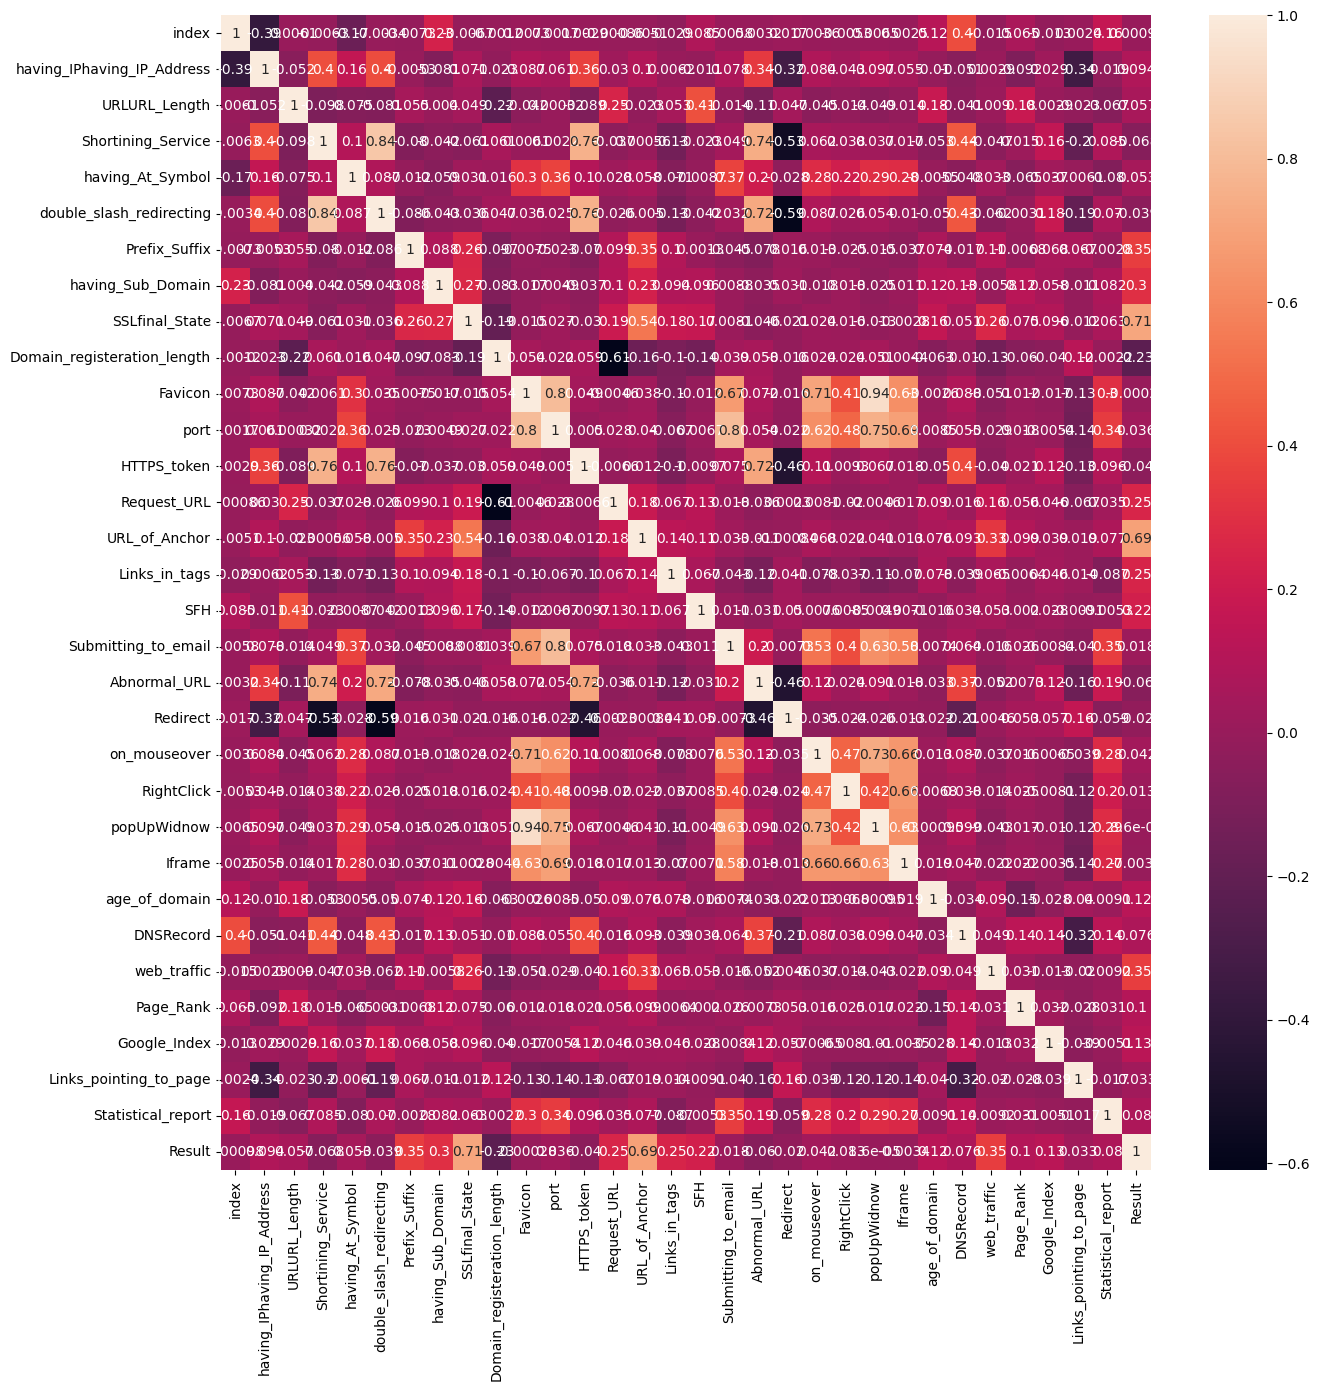

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(ds.corr(), annot=True)
plt.show()

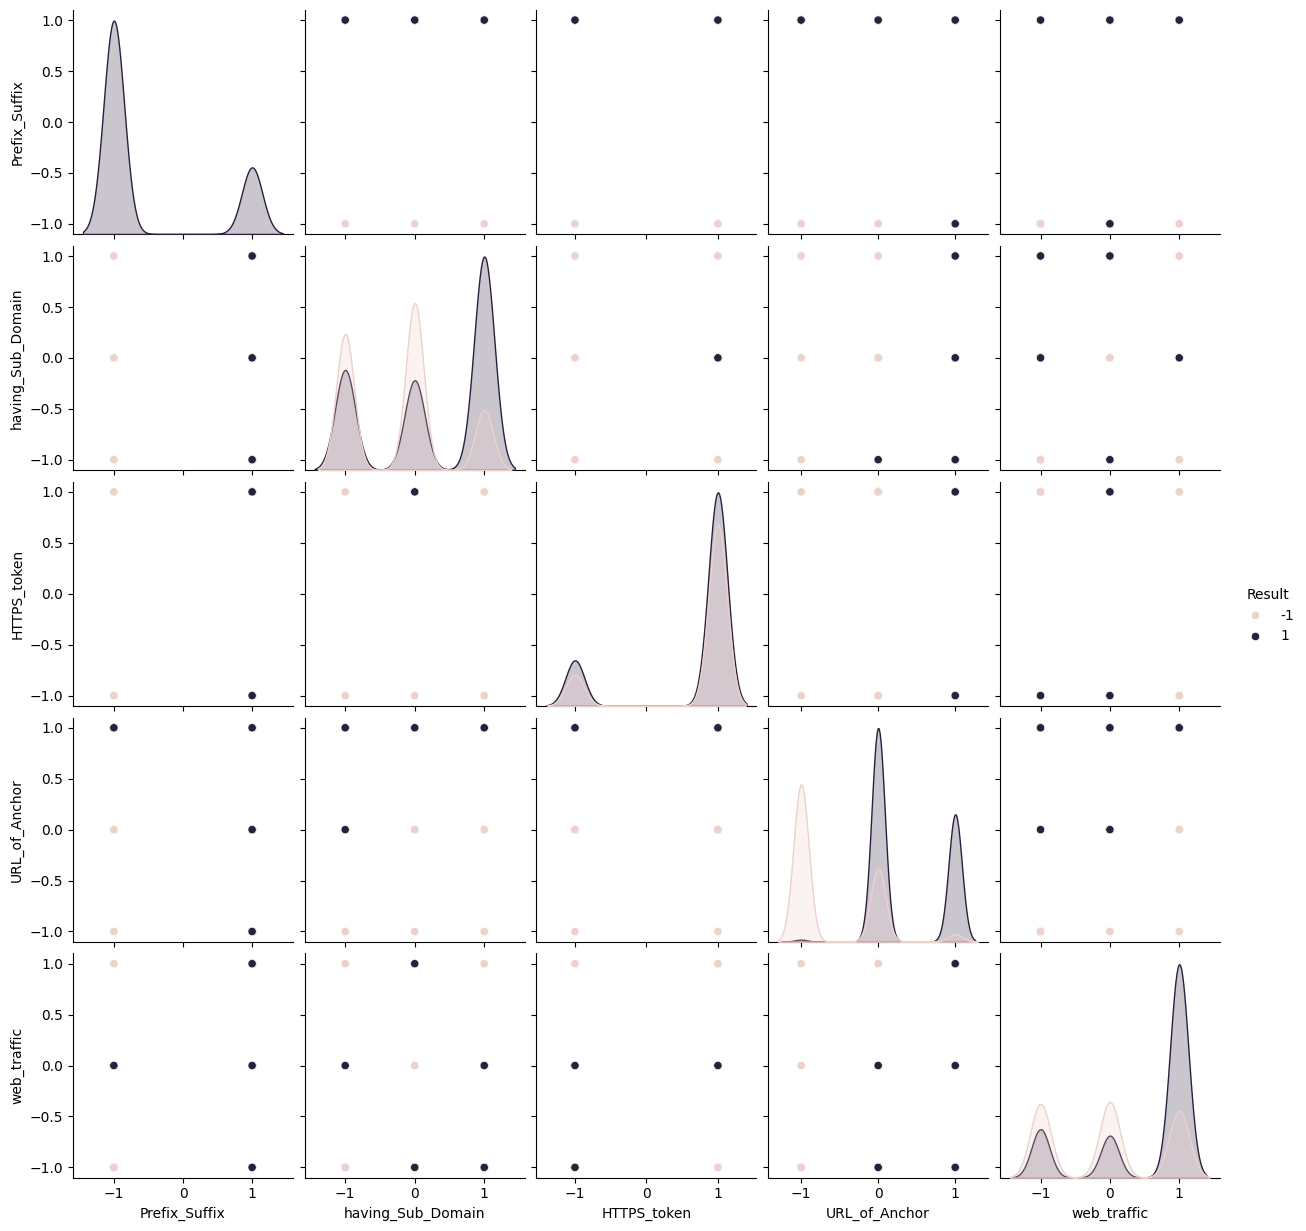

In [ ]:
df = ds[['Prefix_Suffix','having_Sub_Domain','HTTPS_token','URL_of_Anchor','web_traffic','Result']]
sns.pairplot(df,hue="Result",corner=False);

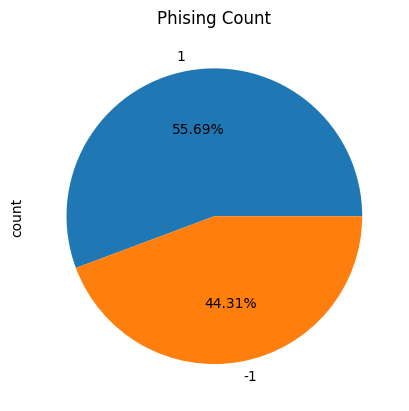

In [ ]:
ds['Result'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Phising Count")
plt.show()

**Splitting the** **dataset**

In [ ]:
x=ds.iloc[:,1:31].values
y=ds.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


**Train and Test**

In [ ]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)
log_reg

0.9172320217096337

In [ ]:
import pickle
pickle.dump(lr,open('Phishing websites.pkl','wb'))

K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier()

In [ ]:
kmodel.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predk = kmodel.predict(x_test)
y_pred_train = kmodel.predict(x_train)

In [ ]:
knn=accuracy_score(y_test,y_predk)
knn1=accuracy_score(y_train,y_pred_train)
print("Accuracy score for testing data: ",knn)
print("Accuracy score for training data: ",knn1)

Accuracy score for testing data:  0.9434644957033017
Accuracy score for training data:  0.965513342379014


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV from sklearn.model_selection

kn2=KNeighborsClassifier()
kn2.fit(x_train,y_train)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Change 'model' to 'kn2' in the GridSearchCV instantiation
grid_search = GridSearchCV(estimator=kn2, param_grid=param_grid,  # Using the KNeighborsClassifier 'kn2'
                           cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print(best_model)

y_pred3=kn2.predict(x_test)
y_pred32=kn2.predict(x_train)

from sklearn.metrics import accuracy_score
knn_man=accuracy_score(y_test,y_pred3)
knn_man1=accuracy_score(y_train,y_pred32)
print(knn_man)
print(knn_man1)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
0.9434644957033017
0.965513342379014


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier class from the sklearn.ensemble module

model = RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_p=model.predict(x_test)
y_p1=model.predict(x_train)
rf1=accuracy_score(y_test, y_p)
rf2=accuracy_score(y_train, y_p1)
print("Accuracy:", rf1)
print("Accuracy:",rf2)

Accuracy: 0.9706015377657169
Accuracy: 0.9902758932609679


Comparing model train and test accuracy

In [ ]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'KNN','Random Forest'],
    'Test Score': [ log_reg,knn,rf1,],'Train Score':[log_reg,knn1,rf2]
    })
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score,Train Score
2,Random Forest,0.970602,0.990276
1,KNN,0.943464,0.965513
0,Logistic Regression,0.917232,0.917232
